In [1]:
import glob
import numpy as np

# cognac data and tools
import cognac.insitu as iu

---
## load and select data

gps files may have to be edited manually 

In [2]:
# select campaign

#campaign = 'microco_leg2.yaml'
#campaign = 'lopstech19_leg1.yaml'
#campaign = 'lopstech19_leg2.yaml'
campaign = 'cognac20.yaml'

cp = iu.campaign(campaign)

In [3]:
# data directory and filename

unit = 'recepteur0' 
#unit = 'recepteur1' # crashes at the moment
#unit = 'recepteur2'

In [3]:
data_dir = cp[unit]['path']+'gps/'
gps_files = sorted(glob.glob(data_dir+'GPS_*.log'))
gps_all = iu.gps.read_gps_lops(gps_files, label=unit, verbose=False)

Reads /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/recepteur0/gps/GPS_20201123104152.log
Reads /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/recepteur0/gps/GPS_20201124124325.log


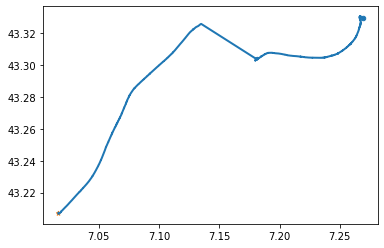

In [4]:
gps_all.plot()

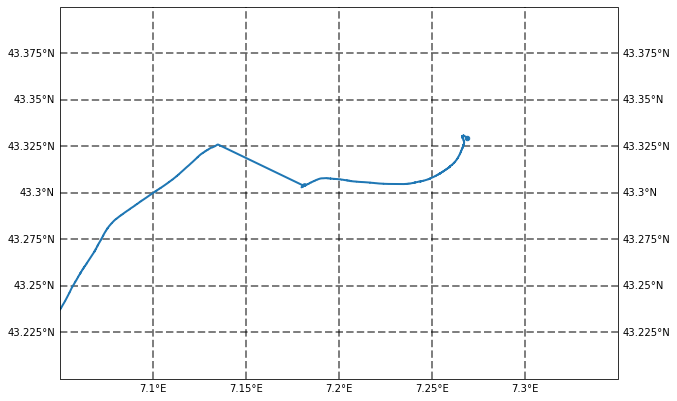

In [5]:
fac = iu.utils.plot_map(cp=cp)
gps_all.plot(fac)

In [6]:
gps_all.plot_bk(unit=cp['recepteur2'], rule='1T')

Loading BokehJS ...

---
## trim data

Look at acoustic data in order to choose time of deployment and recovery

In [7]:
#
# clean gps data with deployment log
gps={}
for r in cp[unit]:
    gps[r.label] = gps_all.clean(r, inplace=False)

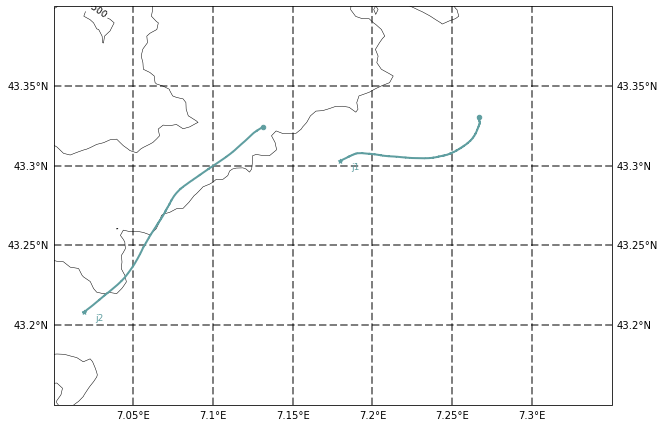

In [14]:
# plot overview map
fac = iu.utils.plot_map(cp=cp, ll_lim=[7., 7.35, 43.15, 43.4])
iu.utils.plot_bathy(fac)
for label, lgps in gps.items():
    if lgps:
        lgps.plot(fac, label=label, color=cp[unit]['color'])

--- 
## store

In [16]:
for label, lgps in gps.items():
    lgps.to_nc(cp.pathp+unit+'_gps_'+label+'.nc')

Data store to /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/datap/recepteur0_gps_j1.nc
Data store to /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/datap/recepteur0_gps_j2.nc
Data store to /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/datap/recepteur0_gps_j2_synchro.nc


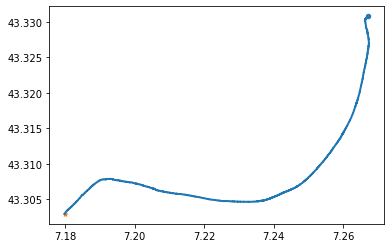

In [9]:
# reload
gps = cp.load('gps', unit=unit)[unit]
gps['j1'].plot()